# Assignment 2
# Task 1: Jacobi Method and Convergence Analysis.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
# Jacobi Method Implementation and Convergence Analysis
# Function to check diagonal dominance
def check_diagonal_dominance(A):
    diagonal_elements = np.abs(np.diag(A))
    off_diagonal_sums = np.sum(np.abs(A), axis=1) - diagonal_elements
    return np.all(diagonal_elements >= off_diagonal_sums)

In [5]:
# Jacobi method function
def jacobi_method(A, b, x0, max_iterations=25, tolerance=1e-10):
    
    n = len(b)
    x = x0.copy()
    iterations = [x.copy()]  # Store the results of each iteration

    for _ in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            # Compute the sum of off-diagonal elements
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            # Update x[i]
            x_new[i] = (b[i] - s) / A[i, i]

        # Store the result of the current iteration
        iterations.append(x_new.copy())

        # Check for convergence using the infinity norm
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            break

        x = x_new  # Update x for the next iteration

    return iterations, x_new

In [6]:
# System of equations (Ax = b)
A = np.array([
    [10, -1, -2],
    [-2, 10, -1],
    [-1, -2, 10]
])
b = np.array([5, -6, 15])

# Check diagonal dominance
is_diagonally_dominant = check_diagonal_dominance(A)
print("Is the matrix diagonally dominant?", is_diagonally_dominant)

# Initial guess
x0 = np.array([0.0, 0.0, 0.0])

# Solve using the Jacobi method
iterations, solution = jacobi_method(A, b, x0)

# Output the results
print("\nIterations:")
for i, x in enumerate(iterations):
    print(f"Iteration {i}: {x}")

print("\nFinal Solution:", solution)


Is the matrix diagonally dominant? True

Iterations:
Iteration 0: [0. 0. 0.]
Iteration 1: [ 0.5 -0.6  1.5]
Iteration 2: [ 0.74 -0.35  1.43]
Iteration 3: [ 0.751 -0.309  1.504]
Iteration 4: [ 0.7699 -0.2994  1.5133]
Iteration 5: [ 0.77272 -0.29469  1.51711]
Iteration 6: [ 0.773953 -0.293745  1.518334]
Iteration 7: [ 0.7742923 -0.293376   1.5186463]
Iteration 8: [ 0.77439166 -0.29327691  1.51875403]
Iteration 9: [ 0.77442312 -0.29324626  1.51878378]
Iteration 10: [ 0.77443213 -0.293237    1.51879306]
Iteration 11: [ 0.77443491 -0.29323427  1.51879581]
Iteration 12: [ 0.77443574 -0.29323344  1.51879664]
Iteration 13: [ 0.77443598 -0.29323319  1.51879689]
Iteration 14: [ 0.77443606 -0.29323311  1.51879696]
Iteration 15: [ 0.77443608 -0.29323309  1.51879698]
Iteration 16: [ 0.77443609 -0.29323309  1.51879699]
Iteration 17: [ 0.77443609 -0.29323308  1.51879699]
Iteration 18: [ 0.77443609 -0.29323308  1.51879699]
Iteration 19: [ 0.77443609 -0.29323308  1.51879699]
Iteration 20: [ 0.77443609 -

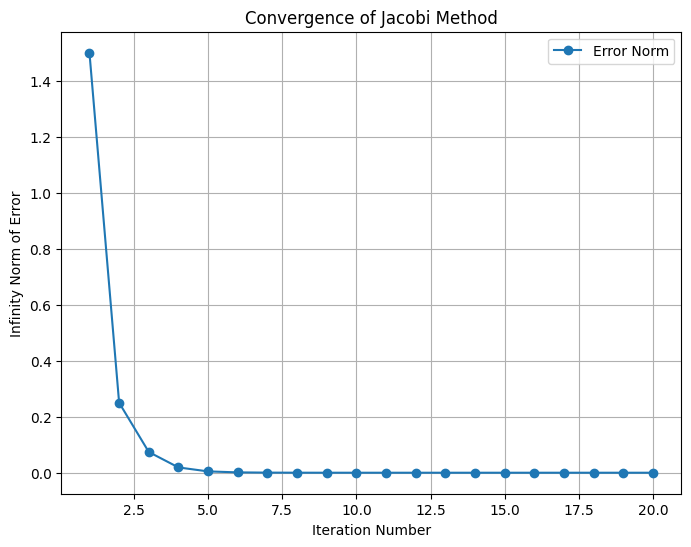

In [7]:
# Convergence Analysis: Error Norm Plot
errors = [np.linalg.norm(iterations[i + 1] - iterations[i], ord=np.inf) for i in range(len(iterations) - 1)]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', label='Error Norm')
plt.xlabel('Iteration Number')
plt.ylabel('Infinity Norm of Error')
plt.title('Convergence of Jacobi Method')
plt.grid()
plt.legend()
plt.show()


# Task 2: Gaussian method with choice of leading element.

In [8]:
# Function to perform Gaussian elimination with partial pivoting
def gaussian_elimination_with_pivot(A, b):
    n = len(b)
    A = A.astype(float)  # Ensure the matrix is in float for division
    b = b.astype(float)

    # Forward elimination
    for i in range(n):
        # Pivoting: Swap rows to place the largest element in the pivot position
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return A, x


In [9]:
# System of equations
A = np.array([
    [2, 3, 1],
    [4, 11, -1],
    [-2, 1, 7]
])
b = np.array([10, 33, 15])

# Solve using Gaussian elimination with pivoting
U, solution = gaussian_elimination_with_pivot(A, b)

In [10]:
# Output the upper triangular matrix and solution
print("Upper Triangular Matrix (U):")
print(U)
print("\nSolution Vector (x):")
print(solution)

Upper Triangular Matrix (U):
[[ 4.  11.  -1. ]
 [ 0.   6.5  6.5]
 [ 0.   0.   4. ]]

Solution Vector (x):
[-0.86538462  3.44230769  1.40384615]


# Task 3: Gauss-Jordan method.

In [11]:
# Function to perform Gauss-Jordan elimination
def gauss_jordan(A, b):
    n = len(b)
    A = A.astype(float)  # Ensure float type for division
    b = b.astype(float)

    # Form the augmented matrix
    augmented_matrix = np.hstack((A, b.reshape(-1, 1)))

    # Perform Gauss-Jordan elimination
    for i in range(n):
        # Pivoting: Ensure the pivot element is non-zero
        if augmented_matrix[i, i] == 0:
            for j in range(i + 1, n):
                if augmented_matrix[j, i] != 0:
                    augmented_matrix[[i, j]] = augmented_matrix[[j, i]]
                    break

        # Normalize the pivot row
        augmented_matrix[i] /= augmented_matrix[i, i]

        # Eliminate all other entries in the current column
        for j in range(n):
            if j != i:
                augmented_matrix[j] -= augmented_matrix[j, i] * augmented_matrix[i]

    # Extract the solution from the augmented matrix
    solution = augmented_matrix[:, -1]

    return augmented_matrix, solution

In [12]:
# System of equations
A = np.array([
    [1, 1, 1],
    [2, -3, 4],
    [3, 4, 5]
])
b = np.array([9, 13, 40])

# Solve using Gauss-Jordan elimination
augmented_matrix, solution = gauss_jordan(A, b)

In [13]:
# Output the results
print("Final Diagonalized Augmented Matrix:")
print(augmented_matrix)
print("\nSolution Vector (x, y, z):")
print(solution)


Final Diagonalized Augmented Matrix:
[[1. 0. 0. 1.]
 [0. 1. 0. 3.]
 [0. 0. 1. 5.]]

Solution Vector (x, y, z):
[1. 3. 5.]


# Task 4: Gauss-Seidel method and stopping criterion.

In [14]:
# Function to perform Gauss-Seidel iteration
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    iterations = []

    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        # Store the current iteration
        iterations.append(x_new.copy())
        
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new

    return x, iterations


In [15]:
# System of equations
A = np.array([
    [8, -3, 2],
    [4, 11, -1],
    [6, 3, 12]
])
b = np.array([20, 33, 36])
x0 = np.array([0, 0, 0])  # Initial guess
tol = 1e-5  # Tolerance
max_iter = 100  # Maximum iterations

# Solve using Gauss-Seidel method
solution, iteration_values = gauss_seidel(A, b, x0, tol, max_iter)


In [16]:
# Output the results
print("Iteration Table:")
print("k\t    x1\t        x2\t        x3")
for i, values in enumerate(iteration_values):
    print(f"{i + 1}\t{values[0]:.6f}\t{values[1]:.6f}\t{values[2]:.6f}")

print("\nFinal Solution:")
print(solution)

Iteration Table:
k	    x1	        x2	        x3
1	2.000000	2.000000	1.000000
2	3.000000	2.000000	1.000000
3	3.000000	2.000000	1.000000

Final Solution:
[3 2 1]


# Task 5: Relaxation method.

In [17]:
# Successive Over-Relaxation (SOR) Method
import time

# Function to perform the SOR method
def sor_method(A, b, x0, omega, tol, max_iter):
    n = len(b)
    x = x0.copy()
    iterations = []

    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - sum1 - sum2)
        
        # Store the current iteration
        iterations.append(x_new.copy())
        
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iterations, k + 1
        x = x_new

    return x, iterations, max_iter

In [18]:
# System of equations
A = np.array([
    [5, 1, 1],
    [1, 4, 2],
    [1, 1, 5]
])
b = np.array([10, 12, 15])
x0 = np.array([0, 0, 0])  # Initial guess
tol = 1e-5  # Tolerance
max_iter = 100  # Maximum iterations

# Solve using SOR method with omega=1.1
omega1 = 1.1
start_time_1 = time.time()
solution_1, iterations_1, iter_count_1 = sor_method(A, b, x0, omega1, tol, max_iter)
end_time_1 = time.time()

# Solve using SOR method with omega=1.5
omega2 = 1.5
start_time_2 = time.time()
solution_2, iterations_2, iter_count_2 = sor_method(A, b, x0, omega2, tol, max_iter)
end_time_2 = time.time()

In [19]:
# Output the results
print("Results for omega = 1.1:")
print("Iterations:")
print("k\t    x1\t        x2\t        x3")
for i, values in enumerate(iterations_1):
    print(f"{i + 1}\t{values[0]:.6f}\t{values[1]:.6f}\t{values[2]:.6f}")
print(f"\nSolution: {solution_1}")
print(f"Execution Time: {end_time_1 - start_time_1:.6f} seconds")
print(f"Number of Iterations: {iter_count_1}\n")

print("Results for omega = 1.5:")
print("Iterations:")
print("k\t    x1\t        x2\t        x3")
for i, values in enumerate(iterations_2):
    print(f"{i + 1}\t{values[0]:.6f}\t{values[1]:.6f}\t{values[2]:.6f}")
print(f"\nSolution: {solution_2}")
print(f"Execution Time: {end_time_2 - start_time_2:.6f} seconds")
print(f"Number of Iterations: {iter_count_2}\n")

Results for omega = 1.1:
Iterations:
k	    x1	        x2	        x3
1	2.000000	2.000000	2.000000
2	1.000000	1.000000	2.000000
3	1.000000	1.000000	2.000000

Solution: [1 1 2]
Execution Time: 0.000458 seconds
Number of Iterations: 3

Results for omega = 1.5:
Iterations:
k	    x1	        x2	        x3
1	3.000000	3.000000	2.000000
2	0.000000	1.000000	3.000000
3	1.000000	1.000000	2.000000
4	1.000000	2.000000	2.000000
5	1.000000	1.000000	2.000000
6	1.000000	2.000000	2.000000
7	1.000000	1.000000	2.000000
8	1.000000	2.000000	2.000000
9	1.000000	1.000000	2.000000
10	1.000000	2.000000	2.000000
11	1.000000	1.000000	2.000000
12	1.000000	2.000000	2.000000
13	1.000000	1.000000	2.000000
14	1.000000	2.000000	2.000000
15	1.000000	1.000000	2.000000
16	1.000000	2.000000	2.000000
17	1.000000	1.000000	2.000000
18	1.000000	2.000000	2.000000
19	1.000000	1.000000	2.000000
20	1.000000	2.000000	2.000000
21	1.000000	1.000000	2.000000
22	1.000000	2.000000	2.000000
23	1.000000	1.000000	2.000000
24	1.000000	2.00000

# Task 6: Ill-conditioned systems.

In [20]:
# Function to solve the system analytically using numpy.linalg.solve
def solve_analytically(A, b):
    return np.linalg.solve(A, b)

In [21]:
# System of equations (original)
A = np.array([
    [1.001, 0.999],
    [1.002, 1.000]
])
b = np.array([2, 2.001])

# Solve analytically
solution_analytical = solve_analytically(A, b)

# Introduce a small perturbation to the coefficients
A_perturbed = np.array([
    [1.001, 0.999],
    [1.002, 1.001]  # Small change in the (2,2) coefficient
])
b_perturbed = np.array([2, 2.001])

# Solve numerically for the perturbed system
solution_perturbed = solve_analytically(A_perturbed, b_perturbed)

In [22]:
# Output results
print("Original System:")
print("Coefficient Matrix (A):")
print(A)
print("Right-Hand Side Vector (b):")
print(b)
print("Solution (Analytical):")
print(solution_analytical)

print("\nPerturbed System:")
print("Coefficient Matrix (A):")
print(A_perturbed)
print("Right-Hand Side Vector (b):")
print(b_perturbed)
print("Solution (Numerical with Perturbation):")
print(solution_perturbed)

Original System:
Coefficient Matrix (A):
[[1.001 0.999]
 [1.002 1.   ]]
Right-Hand Side Vector (b):
[2.    2.001]
Solution (Analytical):
[ 500.50000003 -499.50000003]

Perturbed System:
Coefficient Matrix (A):
[[1.001 0.999]
 [1.002 1.001]]
Right-Hand Side Vector (b):
[2.    2.001]
Solution (Numerical with Perturbation):
[ 2.99202393 -0.99601196]
